#### Dataset

In [2]:
# Datset: petrol_consumption.csv
# Location: https://mitu.co.in/dataset

#### Import the libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Read the data

In [6]:
df = pd.read_csv('petrol_consumption.csv')

In [7]:
df

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [9]:
df.corrwith(df['Petrol_Consumption'])

Petrol_tax                     -0.451280
Average_income                 -0.244862
Paved_Highways                  0.019042
Population_Driver_licence(%)    0.698965
Petrol_Consumption              1.000000
dtype: float64

#### Separate the input and output data

In [11]:
x = df.drop('Petrol_Consumption', axis = 1)
y = df['Petrol_Consumption']

In [12]:
x.shape

(48, 4)

In [13]:
x.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
count,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333
std,0.950770,573.623768,3491.507166,0.055470
min,5.000000,3063.000000,431.000000,0.451000
25%,7.000000,3739.000000,3110.250000,0.529750
50%,7.500000,4298.000000,4735.500000,0.564500
75%,8.125000,4578.750000,7156.000000,0.595250
max,10.000000,5342.000000,17782.000000,0.724000


#### Cross Validation

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [16]:
x_train.shape

(36, 4)

In [17]:
x_test.shape

(12, 4)

#### Build the model

In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
regressor = DecisionTreeRegressor(random_state=0)

In [21]:
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

#### Plot the tree

In [23]:
from sklearn.tree import plot_tree

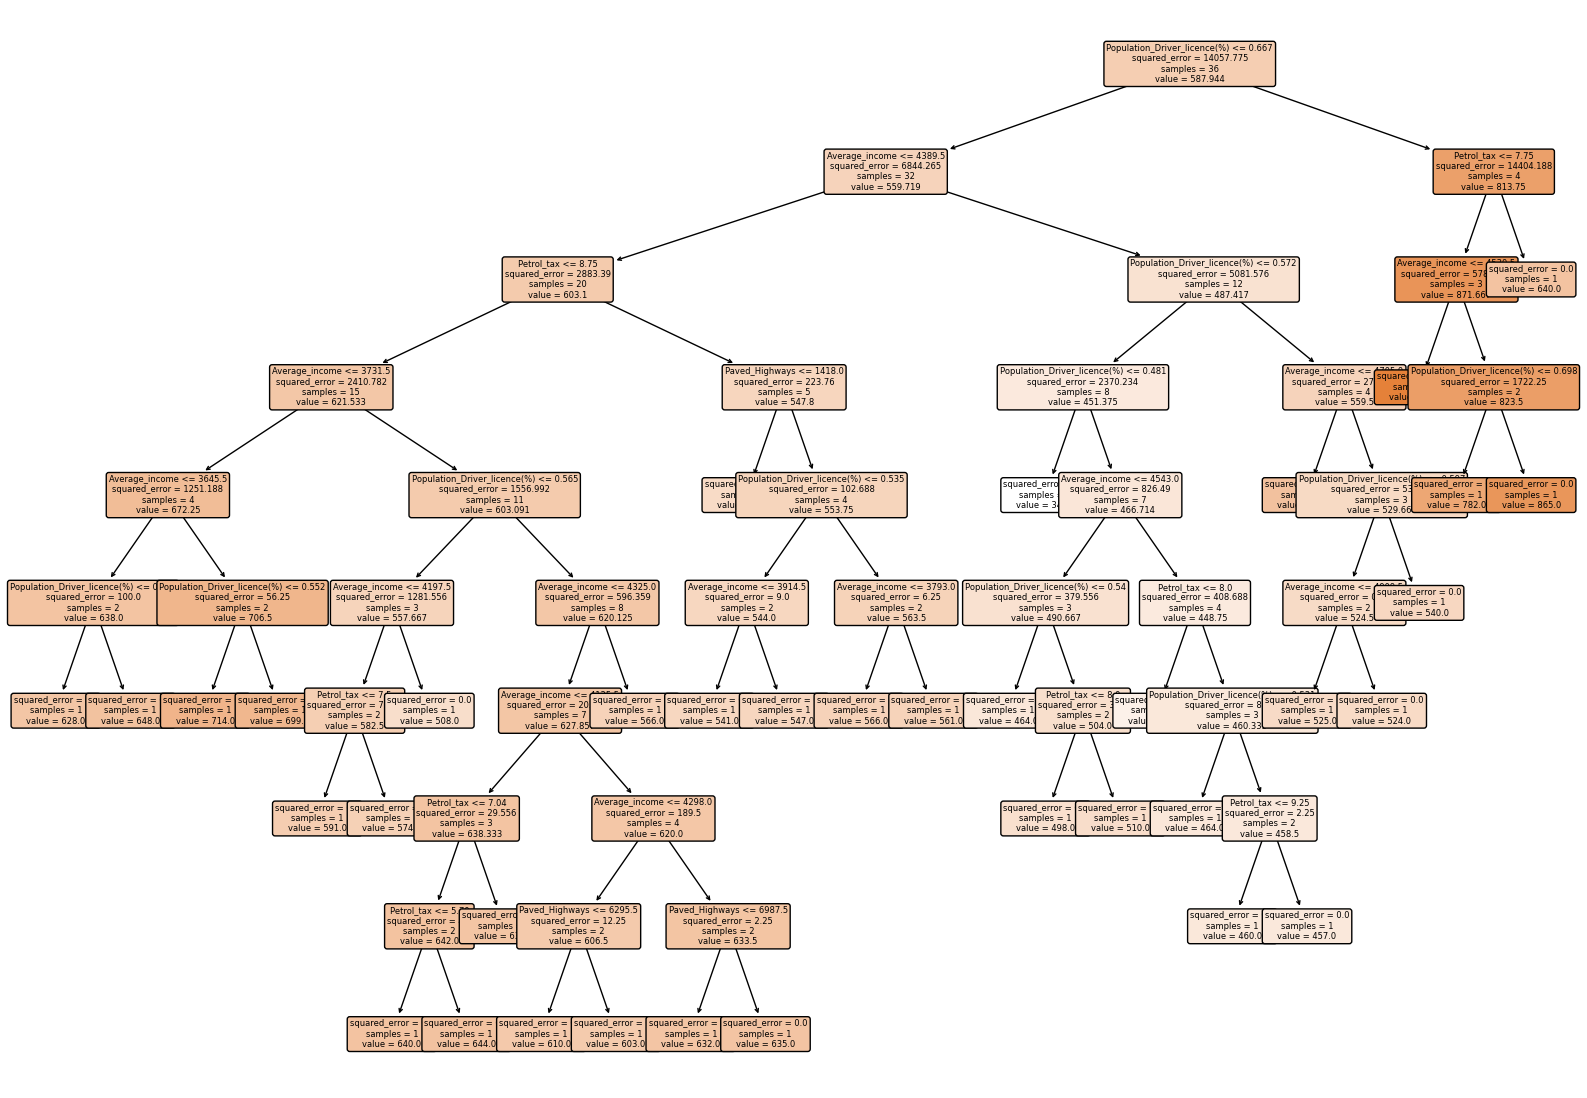

In [26]:
plt.figure(figsize=(20,14))
plot_tree(regressor, fontsize=6, filled=True, feature_names=list(x.columns),
         rounded=True);
plt.savefig('mytree.png')

#### Performance Evaluation

In [28]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [29]:
y_pred = regressor.predict(x_test)

In [30]:
result = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

In [31]:
result

,Actual,Predicted
29,534,541.0
4,410,498.0
26,577,628.0
30,571,628.0
32,577,628.0
37,704,644.0
34,487,628.0
40,587,649.0
7,467,414.0
10,580,464.0


In [34]:
np.mean(abs(y_test - y_pred))

68.08333333333333

In [35]:
mean_absolute_error(y_test, y_pred)

68.08333333333333

In [37]:
mean_absolute_percentage_error(y_test, y_pred)

0.1294003614849453

In [43]:
# root mean squared error / RMSE
np.sqrt(np.mean((y_test - y_pred) ** 2))

75.58604368532593

In [44]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

75.58604368532593

In [55]:
new = pd.DataFrame([[6.58, 3810, 7634, 0.569],[7.09, 3626, 3785, 0.763]],
                  columns=x.columns)

In [56]:
new

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,6.58,3810,7634,0.569
1,7.09,3626,3785,0.763


In [57]:
regressor.predict(new)

array([644., 968.])